In [1]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os

In [10]:
DIRNAME = os.path.dirname(os.getcwd())
IMG_PATH = os.path.join(DIRNAME,"data")
IMG_ANNOTATION_PATH = os.path.join(DIRNAME,"data_clean.csv")

In [15]:
dataset = pd.read_csv(IMG_ANNOTATION_PATH,sep=",")

In [16]:
dataset

,image_label,nb_coins,value,units,cents
0,006.jpeg,23,3 euros 32 centimes,3,32
1,007.jpeg,23,3 euros 32 centimes,3,32
2,008.jpeg,14,1 euro 66 centimes,1,66
3,009.jpeg,14,1 euro 66 centimes,1,66
4,010.jpeg,10,1 euro 19 centimes,1,19
...,...,...,...,...,...
77,PXL_20240206_141524308.jpg,1,1 euro,1,0
78,PXL_20240206_141535905.jpg,3,3 euros 20 centimes,3,20
79,PXL_20240206_141545421.jpg,6,4 euros 80 centimes,4,80
80,PXL_20240206_231416015.jpg,4,35 centimes,0,35


In [100]:
dataset = dataset.rename(columns={'Nom image': 'image_label', 'Nombre de pièces': 'nb_coins', 'Valeur ': 'value'})

In [102]:
split_values = dataset['value'].str.split().tolist()
values_dict_list = []
for value in split_values:
    if len(value) > 2 :
        values_dict_list.append({"units":value[0],"cents":value[2]})
    elif len(value) == 2 :
        if "euro" in value[1]:
            values_dict_list.append({"units":value[0],"cents":0})
        elif "cent" in value[1]:
            values_dict_list.append({"units":0,"cents":value[0]})



In [103]:
values_df = pd.DataFrame(values_dict_list)
values_df

,units,cents
0,3,32
1,3,32
2,1,66
3,1,66
4,1,19
...,...,...
77,1,0
78,3,20
79,4,80
80,0,35


In [104]:
dataset = pd.concat([dataset, values_df], axis=1)

In [107]:
dataset.to_csv("data_clean.csv", index=False)

In [17]:
def read_images():
    images = {}
    for filename in os.listdir(IMG_PATH):
        img = cv2.imread(os.path.join(IMG_PATH, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images[filename] = img
        else:
            print("Error with file", filename)
    return images

In [18]:
images = read_images()


In [55]:
img = images["IMG_1642.JPG"]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [14]:
dataset

,"image_label,nb_coins,value,units,cents"
0,"006.jpeg,23,3 euros 32 centimes,3,32"
1,"007.jpeg,23,3 euros 32 centimes,3,32"
2,"008.jpeg,14,1 euro 66 centimes,1,66"
3,"009.jpeg,14,1 euro 66 centimes,1,66"
4,"010.jpeg,10,1 euro 19 centimes,1,19"
...,...
77,"PXL_20240206_141524308.jpg,1,1 euro,1,0"
78,"PXL_20240206_141535905.jpg,3,3 euros 20 centim..."
79,"PXL_20240206_141545421.jpg,6,4 euros 80 centim..."
80,"PXL_20240206_231416015.jpg,4,35 centimes,0,35"


In [52]:
annotation = dataset[dataset["image_label"] == "IMG_1642.JPG"]

In [31]:
annotation

,image_label,nb_coins,value,units,cents
36,IMG_1642.JPG,8,4 euros 87 centimes,4,87


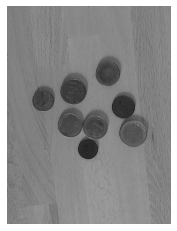

In [56]:
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [57]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [58]:
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

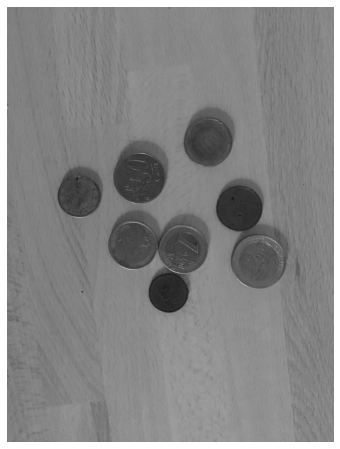

In [59]:
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

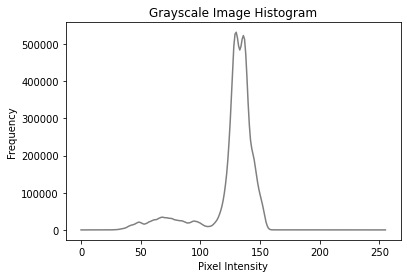

In [60]:
histogram = cv2.calcHist([blurred], [0], None, [256], [0, 256])

plt.plot(histogram, color='gray')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Grayscale Image Histogram')
plt.show()

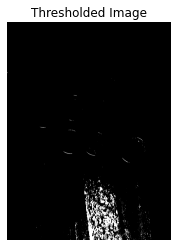

In [61]:
_, thresholded_image = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)

plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

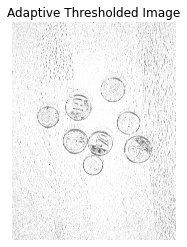

In [62]:
adaptive_thresholded_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the adaptive thresholded image using Matplotlib
plt.imshow(adaptive_thresholded_image, cmap='gray')
plt.title('Adaptive Thresholded Image')
plt.axis('off')
plt.show()

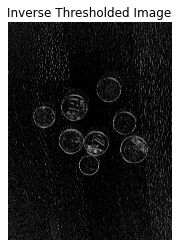

In [63]:
inverse_thresholded_image = cv2.bitwise_not(adaptive_thresholded_image)

# Display the inverse thresholded image using Matplotlib
plt.imshow(inverse_thresholded_image, cmap='gray')
plt.title('Inverse Thresholded Image')
plt.axis('off')
plt.show()

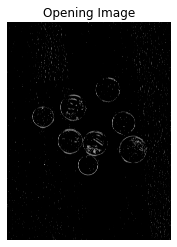

In [64]:
kernel_size = 5  

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

opening_image = cv2.morphologyEx(inverse_thresholded_image, cv2.MORPH_OPEN, kernel)

plt.imshow(opening_image, cmap='gray')
plt.title('Opening Image')
plt.axis('off')
plt.show()

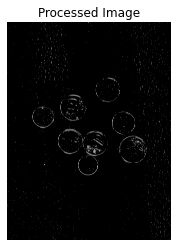

In [68]:
closing_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
processed_image = cv2.morphologyEx(opening_image, cv2.MORPH_CLOSE, closing_kernel)
plt.imshow(processed_image, cmap='gray')
plt.axis('off')
plt.show()

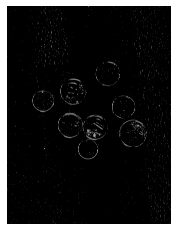

In [71]:
filtered_image = cv2.blur(processed_image, (5,5))
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()

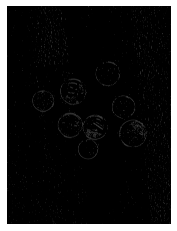

In [74]:
edges = cv2.Canny(filtered_image, threshold1=100, threshold2=200) 
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

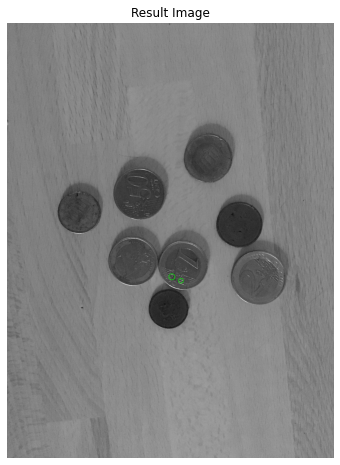

In [77]:
circles = cv2.HoughCircles(filtered_image, cv2.HOUGH_GRADIENT, dp=1, minDist=100,
                           param1=100, param2=100, minRadius=100, maxRadius=300)

# Draw detected circles on the original image
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 4)

plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

plt.imshow(img)
plt.title('Result Image')
plt.axis('off')
plt.show()